In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
df=pd.read_csv("D:/AI&ML Internship/Housing Price.csv")

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
x=df[["area","bedrooms","bathrooms"]] # independent variables
y=df["price"]   # target variable

In [8]:
# Split Train and test Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
# Fit linear regression model

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [10]:
y_pred=model.predict(x_test)

In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)


MAE: 1265275.6699454372
MSE: 2750040479309.0503
R² Score: 0.45592991188724485


In [13]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Feature Names:", x.columns)


Intercept: 59485.379208716564
Coefficients: [3.45466570e+02 3.60197650e+05 1.42231966e+06]
Feature Names: Index(['area', 'bedrooms', 'bathrooms'], dtype='object')


C:\Users\Rudra\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


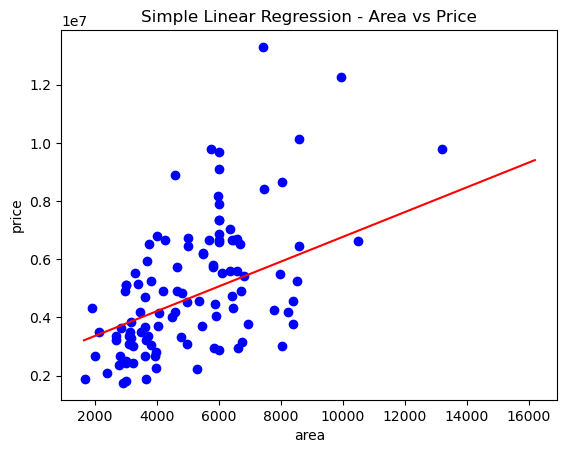

In [17]:
# 1. Use only 'area' as input
x_area = df[['area']]
y = df['price']

# 2. Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_area, y, test_size=0.2, random_state=42)

# 3. Fit model
model = LinearRegression()
model.fit(x_train, y_train)

# 4. Predict for line (across sorted area values)
area_range = np.linspace(x_area.min(), x_area.max(), 100).reshape(-1, 1)
price_pred_line = model.predict(area_range)

# 5. Plot
plt.scatter(x_test, y_test, color='blue')
plt.plot(area_range, price_pred_line, color='red')
plt.xlabel("area")
plt.ylabel("price")
plt.title("Simple Linear Regression - Area vs Price")
plt.show()
